<a href="https://colab.research.google.com/github/cincasoler/IMAGEN/blob/main/CARLOS_IMAGEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import cv2
cv2.__version__

'4.1.2'

In [37]:
import numpy as np
import plotly.express as px

In [68]:
!wget https://github.com/diplomado-ia-pucp/dava/raw/main/pathology_cll20x01.jpg
!wget https://github.com/diplomado-ia-pucp/dava/raw/main/pathology_cll40x03.jpg

--2022-05-06 22:37:51--  https://github.com/diplomado-ia-pucp/dava/raw/main/pathology_cll20x01.jpg
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/diplomado-ia-pucp/dava/main/pathology_cll20x01.jpg [following]
--2022-05-06 22:37:51--  https://raw.githubusercontent.com/diplomado-ia-pucp/dava/main/pathology_cll20x01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212361 (207K) [image/jpeg]
Saving to: ‘pathology_cll20x01.jpg’

pathology_cll20x01. 100%[===================>] 207.38K  --.-KB/s    in 0.03s   

2022-05-06 22:37:51 (6.57 MB/s) - ‘pathology_cll20x01.jpg’ saved [212361/212361]

--2022-


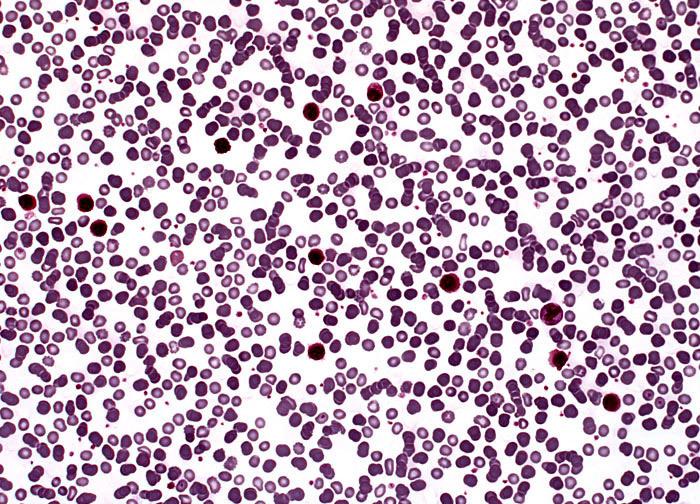


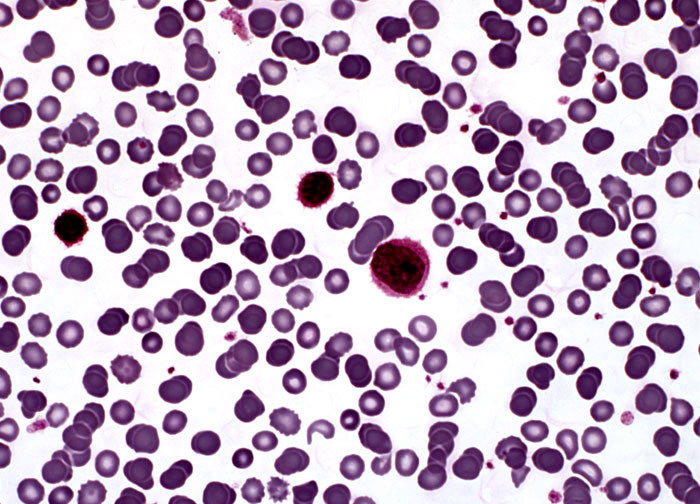

In [70]:
img1 = cv2.imread('pathology_cll20x01.jpg')
img2 = cv2.imread('pathology_cll40x03.jpg')

fig = px.imshow(img1)
fig.show()

fig = px.imshow(img2)
fig.show()


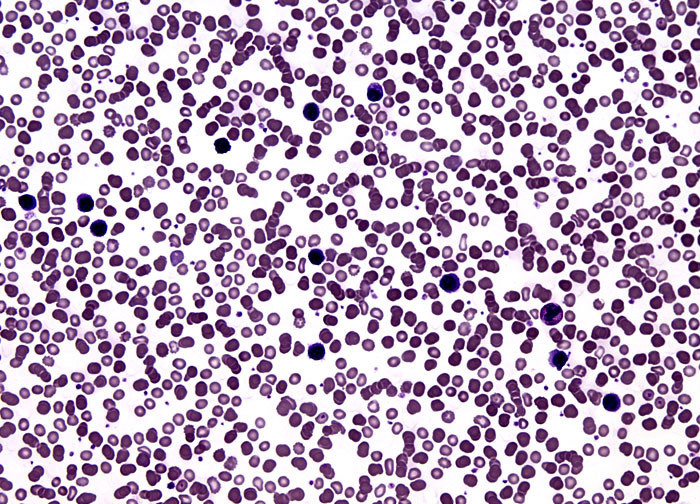


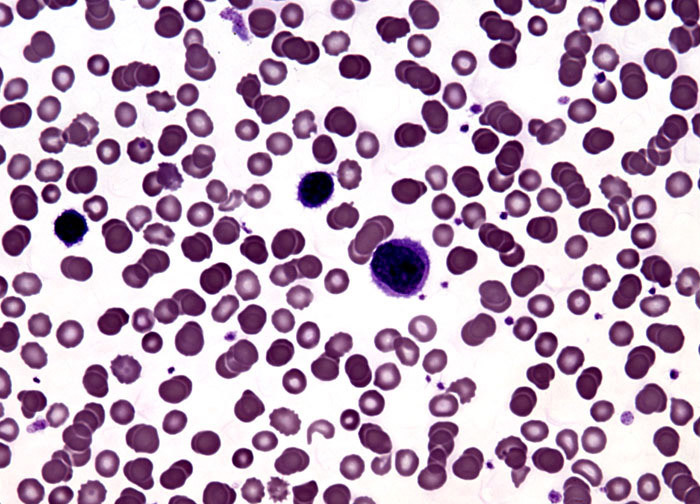

Color en el pixel 50,50: [240 227 237]
Color en el pixel 50,50: [110  38  84]


In [71]:
#img = img[:, :, [2, 1, 0]] # Forma 1
#img = img[:,:,::-1] # Forma 2
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig = px.imshow(img1)
fig.show()

fig = px.imshow(img2)
fig.show()

print('Color en el pixel 50,50:', img1[50,50,:])
print('Color en el pixel 50,50:', img2[50,50,:])

In [72]:
# Convertir imagen a escala de grises
#imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Alternativamente, uno puede leer la imagen como escala de grises así:
imgGray1 = cv2.imread('pathology_cll20x01.jpg',0)
imgGray2 = cv2.imread('pathology_cll40x03.jpg',0)

print(imgGray1.shape)
print(imgGray2.shape)

fig = px.imshow(imgGray1, color_continuous_scale='gray')
fig.show()

fig = px.imshow(imgGray2, color_continuous_scale='gray')
fig.show()

(504, 700)
(504, 700)


In [75]:
imgHSV1 = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
imgHSV2 = cv2.cvtColor(img2, cv2.COLOR_RGB2HSV)


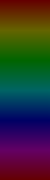

In [76]:
paleta = np.zeros((180, 50, 3), np.uint8)

for i in range(0, 180):
  for j in range(0, 50):
    paleta[i,j,0] = i # H ...
    paleta[i,j,1] = 255 # S
    paleta[i,j,2] = 100 # V

paletaRGB = cv2.cvtColor(paleta, cv2.COLOR_HSV2RGB)

fig = px.imshow(paletaRGB)
fig.show()


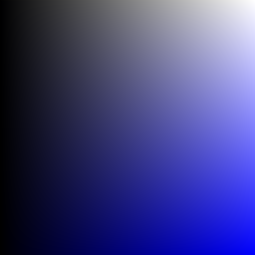

In [112]:
# Paleta para un color HSV
paleta = np.zeros((255,255,3), np.uint8)

for i in range(255):
  for j in range(255):
    paleta[i,j,0] = 120 # ...
    paleta[i,j,1] = i
    paleta[i,j,2] = j    

paletaRGB = cv2.cvtColor(paleta, cv2.COLOR_HSV2RGB)

fig = px.imshow(paletaRGB)
fig.show()

In [122]:
# Creamos un pixel de color y lo convertimos a HSV
amarillo = np.uint8([[[255, 255, 0]]])

amarilloHSV = cv2.cvtColor(amarillo, cv2.COLOR_RGB2HSV)
print(amarilloHSV)

[[[ 30 255 255]]]



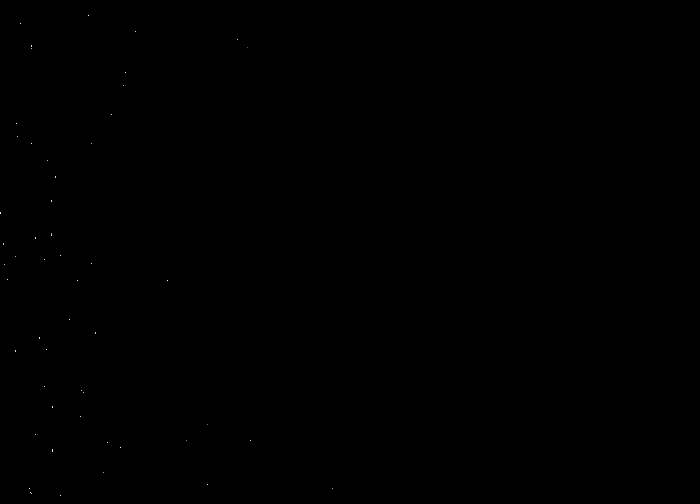


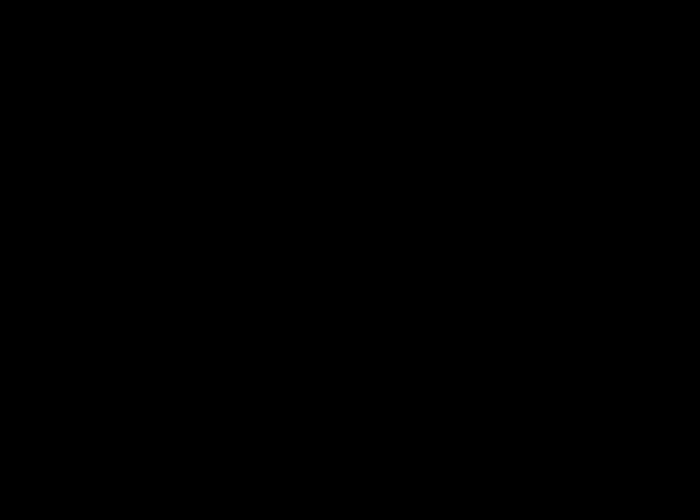

In [123]:
# imgHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lower_amarillo = np.array([20, 50, 50])
upper_amarillo = np.array([40, 255, 255])

# Buscamos todos los pixeles que estan entre el minimo y maximo amarillo
mask1 = cv2.inRange(imgHSV1, lower_amarillo, upper_amarillo)
mask2 = cv2.inRange(imgHSV2, lower_amarillo, upper_amarillo)

# Obtenemos solo los pixeles que tienen las propiedades definidas
res1 = cv2.bitwise_and(img1, img1, mask = mask1)
res2 = cv2.bitwise_and(img2, img2, mask = mask2)

# Mostramos las imágenes
fig = px.imshow(mask1, color_continuous_scale='gray')
fig.show()

fig = px.imshow(res1)
fig.show()


fig = px.imshow(mask2, color_continuous_scale='gray')
fig.show()

fig = px.imshow(res2)
fig.show()